In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0, 0.5, 'Number of data points')

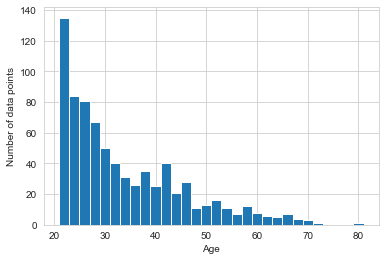

In [5]:
import seaborn as sns

# Plotting histogram of the age variable
sns.set_style('whitegrid')            # sets the style of the plots; it affects things like color of the axes, whether grid enabled or not.
df['Age'].hist(bins=30)               # plots histogram with with bins = 30
plt.xlabel('Age')                     # labels the x - axis as 'Age'
plt.ylabel('Number of data points')   # labels y - axis as 'Number of data points'

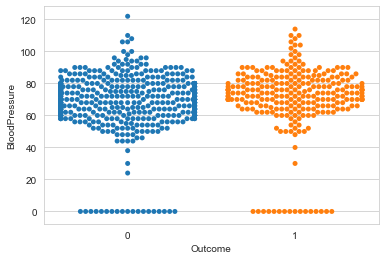

<Figure size 1440x720 with 0 Axes>

In [12]:
# Constructing swarm plot 
sns.swarmplot(x="Outcome", y="BloodPressure", data=df)
plt.figure(figsize=(20,10))

# Show plot
plt.show()

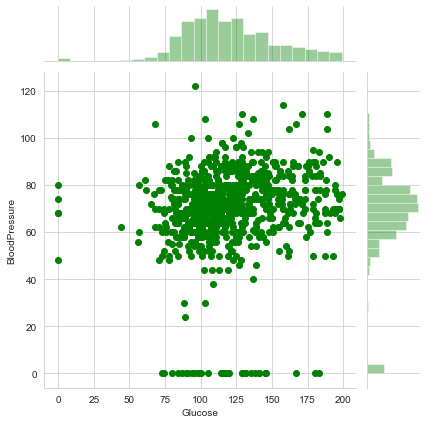

In [14]:
sns.jointplot(x='Glucose',y='BloodPressure',data=df,color='green')

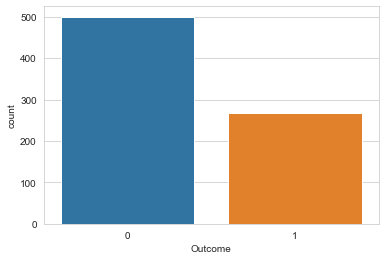

In [16]:
sns.countplot(df.Outcome)

In [23]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1


In [26]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42)
dt.fit(X_train,y_train)
predict_train = dt.predict(X_train)
predict_test = dt.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict_test))

0.7748917748917749


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[313  45]
 [ 79 100]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       358
           1       0.69      0.56      0.62       179

    accuracy                           0.77       537
   macro avg       0.74      0.72      0.73       537
weighted avg       0.76      0.77      0.76       537



In [30]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[128  14]
 [ 38  51]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       142
           1       0.78      0.57      0.66        89

    accuracy                           0.77       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.77      0.77       231

